<a href="https://colab.research.google.com/github/Mbalajiviswanadh/L-tree/blob/main/intern_project_mnist_usingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [2]:
import numpy as np
from numpy import unique, argmax
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Dropout
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
from keras.utils import to_categorical
import seaborn as sns

np.random.seed(0)

#Data Loading

In [3]:
#here we are loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#Reshaping or Preparing the Data

In [4]:
#reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],x_test.shape[2],1))



In [5]:
#normalizing the valus of pixels of images for good accuracy

x_train = x_train.astype('float32')/255.0

x_test = x_test.astype('float32')/255.0


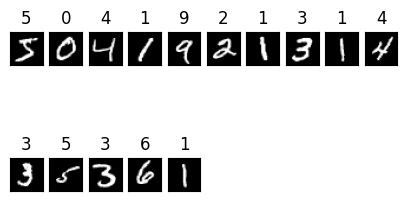

In [6]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
  ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]),cmap='gray')
  ax.set_title(y_train[i])

In [8]:
# Determine the shape of the input images
img_shape = (*x_train.shape[1:], 1)
print(img_shape)

(28, 28, 1, 1)


#Visualize Examples

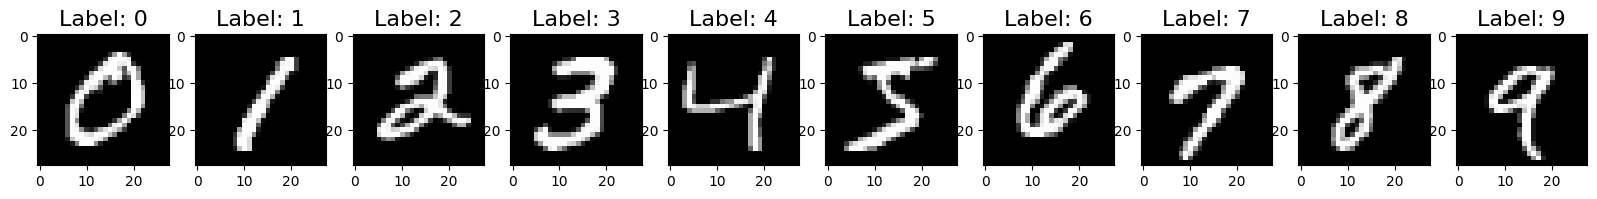

In [10]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [11]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Creating the Model

In [14]:
#Here we are defining the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

#To get more clarity on the above summary

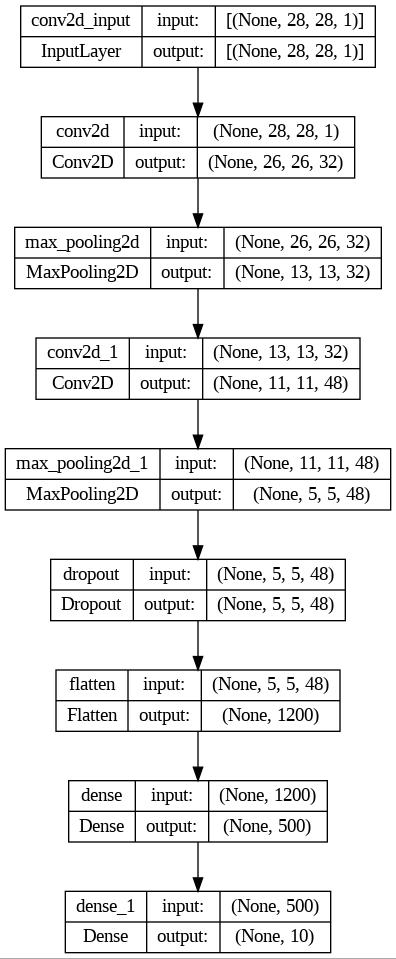

In [15]:
# Here we are making a flow chart for the above summary 
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.jpg', show_shapes=True)


#Now Trainig the model

In [51]:
# Assuming you have defined and compiled your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have defined your training and validation data (x_train, y_train, x_val, y_val)

# Train the model and store the history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))




Epoch 1/10
1875/1875 [==============================] - 72s 37ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0228 - val_accuracy: 0.9932
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0238 - val_accuracy: 0.9943
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.0247 - val_accuracy: 0.9938
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0267 - val_accuracy: 0.9940
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0246 - val_accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0227 - val_accuracy: 0.9943
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0235 -

#Evaluate

In [53]:
#evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('Test accuracy in percent:', test_accuracy*100)

313/313 [==============================] - 3s 9ms/step - loss: 0.0278 - accuracy: 0.9935
Test loss: 0.02779492549598217
Test accuracy: 0.9934999942779541
Test accuracy in percent: 99.34999942779541


In [67]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 4s 14ms/step
[[1.33593412e-15 5.81778983e-13 2.37782922e-15 ... 9.99999940e-01
  3.96833445e-13 1.01803006e-12]
 [8.38842986e-16 9.72661416e-19 9.99999940e-01 ... 1.88932668e-27
  7.47511972e-25 3.29997902e-30]
 [1.55584145e-15 9.99999940e-01 3.56095280e-13 ... 1.97468066e-11
  4.83947691e-12 2.71258426e-15]
 ...
 [1.00862634e-25 2.18057917e-15 1.15851988e-17 ... 4.95654895e-19
  5.53788447e-15 1.48339408e-15]
 [3.77271659e-18 1.85754871e-17 4.49280792e-18 ... 7.31019832e-20
  5.56563184e-10 5.65730553e-16]
 [1.09259844e-10 2.39583353e-12 2.17675877e-09 ... 3.27544311e-18
  8.22740747e-12 6.26379238e-14]]
[7 2 1 ... 4 5 6]


#Graphs

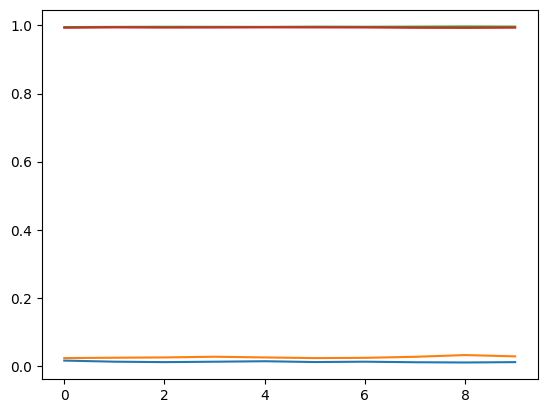

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

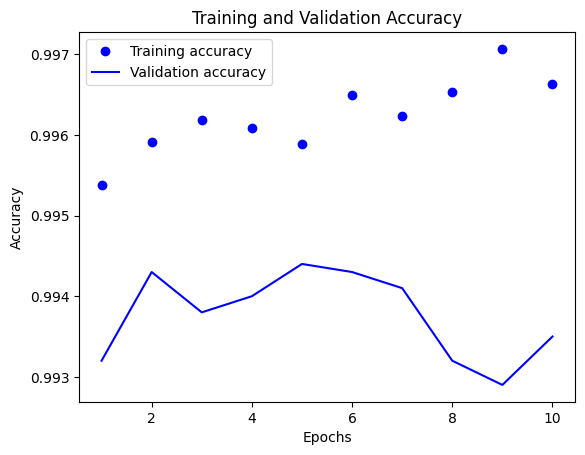

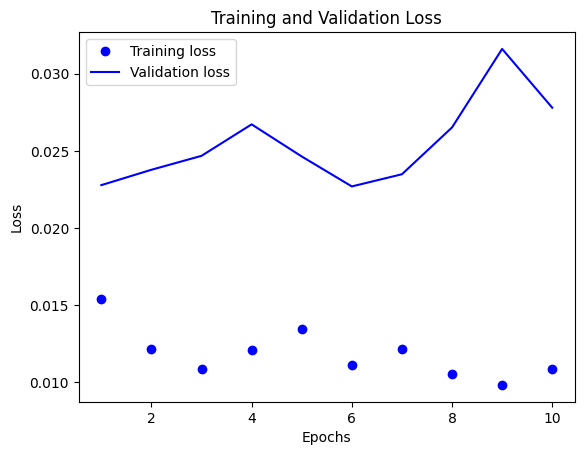

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Verification

Enter any number:5


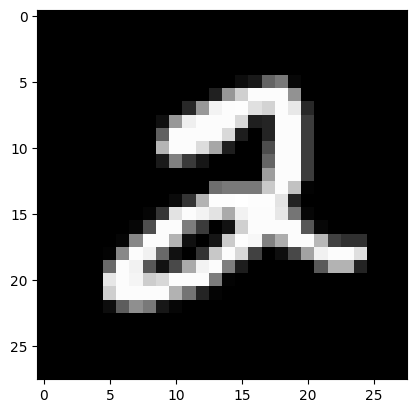

In [68]:
#here we are verifing the performance by making serveral predictions
i=int(input('Enter any number:'))
image = x_train[i]
#lets display the image which we want to 'predict'
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()


In [69]:
#Here we are finding whether the above prediction is correct or wrong 

image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
print('Predicted : {}'.format(argmax(p)))

1/1 [==============================] - 0s 25ms/step
Predicted : 2


#Single Example ||another verification example

313/313 [==============================] - 3s 10ms/step


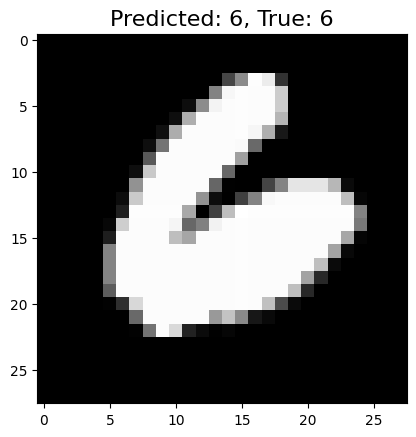

In [65]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_pred = model.predict(x_test)
y_sample_pred_class = np.argmax(y_pred, axis=1)[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')
plt.show()
